In [3]:
import numpy as np
from numpy.random import randint as rand

import matplotlib as mpl
import requests
import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

from classes import GCNEvent, User, get_constellation

from astropy.coordinates import SkyCord, get_body 
from astropy.time import Time 

In [4]:
# set this to True if you want to debug and only use a few of the events! 
debug = True

#The function that does the magic
#  (easy to modify to also get energy, signalness, whatever if you like)
def GetLonsAndLats(url):
    r = requests.get(url, allow_redirects=True)
    lines=r.text.split("\n")
    events = []

    count = 0
    for l in lines:
        if count>=20 and debug:
            break
        if("href=notices_amon" in l):
            count +=1 
            try:
                url="https://gcn.gsfc.nasa.gov/"+l.split("=")[-1].split(">")[0]
                print(url)
                r = str(requests.get(url, allow_redirects=True).content)
                request_full = r.split("\\n")
                event = GCNEvent(request_full) # everything you should need!
                #print(coords)
                events.append(event)
            except:
                print("Skipping")
    return events

In [5]:
# Pick an event type!
icecube_astrotracks_url='https://gcn.gsfc.nasa.gov/amon_icecube_gold_bronze_events.html'
icecube_ehe_url='https://gcn.gsfc.nasa.gov/amon_ehe_events.html'
icecube_hese_url='https://gcn.gsfc.nasa.gov/amon_hese_events.html'

# And get the ecliptic coordinates like this 
#  (you can click any of the URLs to see full report)
events=GetLonsAndLats(icecube_astrotracks_url)

lons = [evt.lon for evt in events]
lats = [evt.lat for evt in events]

https://gcn.gsfc.nasa.gov/notices_amon_g_b/135363_69917294.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135363_69917294.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135302_36915486.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135292_56063172.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135292_56063172.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135270_69188496.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135113_19489408.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134994_1103075.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134979_17138286.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134979_17138286.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134818_73718836.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134818_73718836.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134817_29175858.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134817_29175858.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134777_8912764.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b

Text(0, 0.5, 'Ecliptic Latitutde')

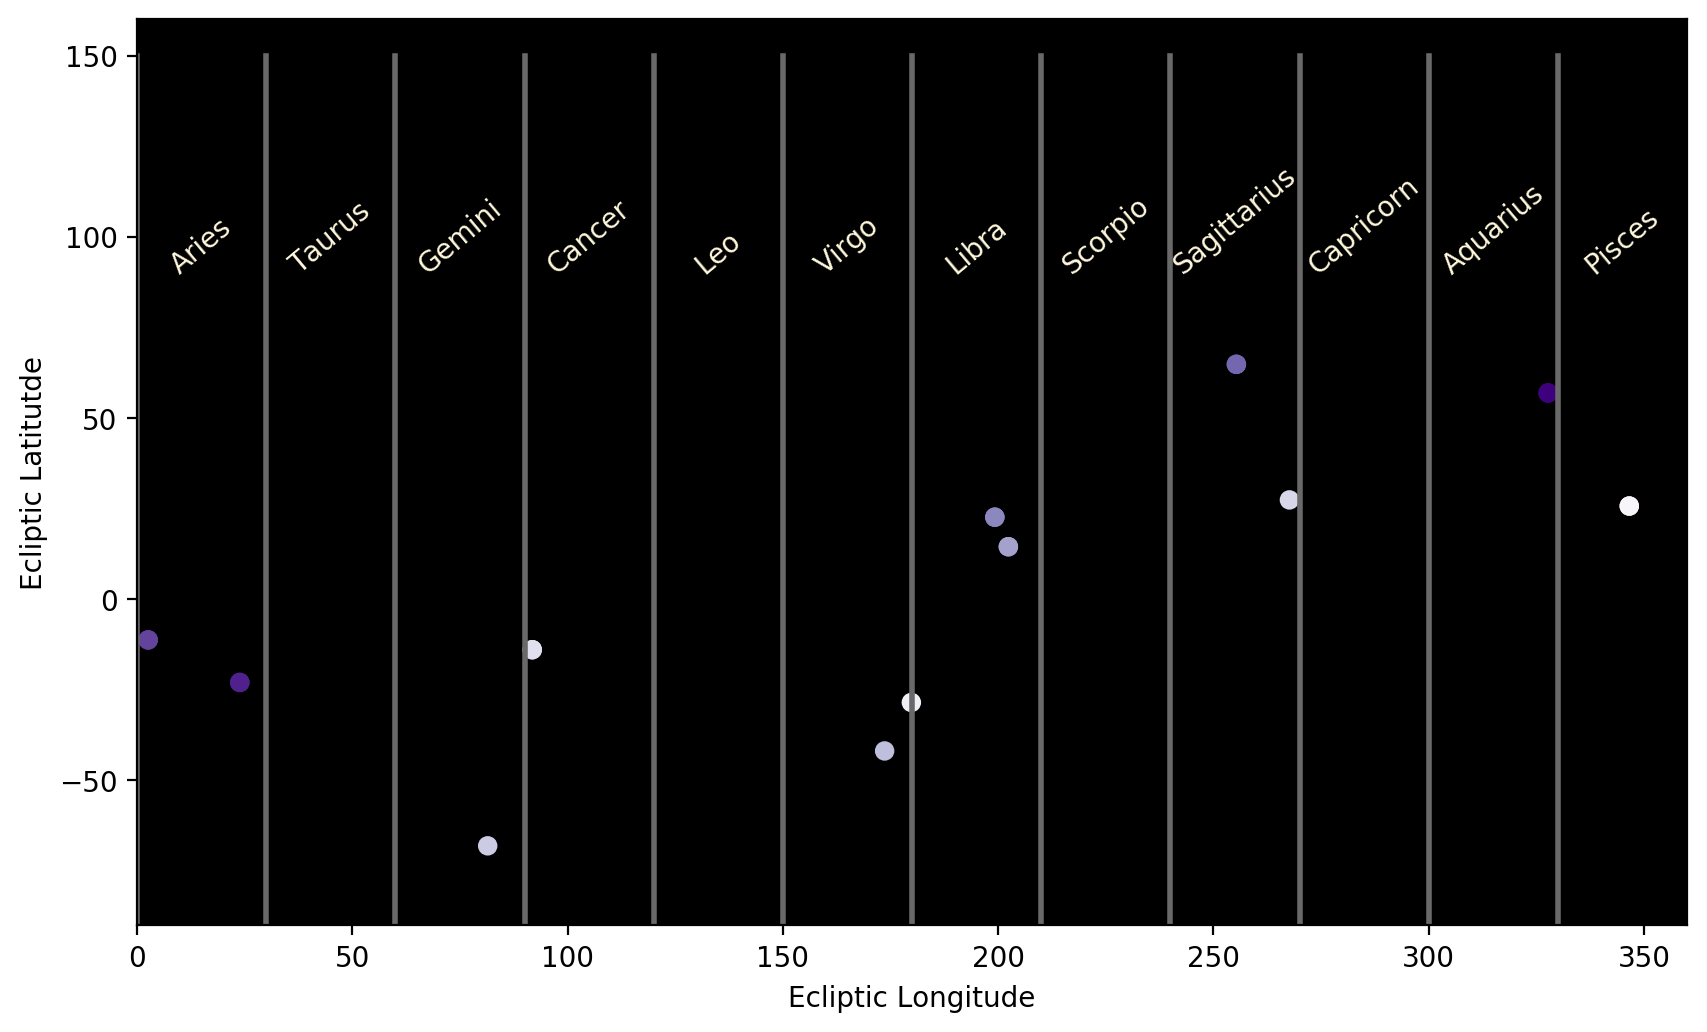

In [6]:

Zodiacs=['Aries','Taurus','Gemini','Cancer','Leo','Virgo','Libra','Scorpio','Sagittarius','Capricorn','Aquarius','Pisces']
plt.figure(figsize=(10,6),dpi=200)
ax=plt.gca()
ax.set_facecolor("black")
col=np.arange(len(lats))
plt.scatter(lons,lats,c=col,cmap=cm.Purples)
for i in range(0,12):
    plt.plot([i*30,i*30],[-90,150],'-',color='dimgrey',linewidth=2)
    plt.text(30*i+15,90,Zodiacs[i],ha='center',color='cornsilk',rotation=40)
plt.xlim(0,360)
plt.ylim(-90,160)
plt.xlabel("Ecliptic Longitude")
plt.ylabel("Ecliptic Latitutde")


In [7]:
fake_user_1 = User("John Doe, place@domain.com, 02/19/1991, 36.6, -99.1")
fake_user_2 = User("Jane Moose, web@site.com, 04/01/1982, 23.6, -19.1")

options = ["Good", "Okay", "Bad"]

# see "events" from cell 5 if you want some debug events 


def make_horoscope( user_obj, event):
    if not isinstance(user_obj, User):
        raise TypeError("Expected {}, got {}".format(User, type(user_obj)))
    if not isinstance(event, GCNEvent):
        raise TypeError("Expected {}, got {}".format(GCNEvent, type(event)))

    # consider something like get_body("name", event.time, location=user.location) --> sky coordinatfrom astropy import Time e
    # then get_constellation( sky coordinate )
            
    return "You will have a {} day".format(options[rand(len(options))])
